In [10]:
from vfield import render_flow_field
import torch
import matplotlib.pyplot as plt
from PIL import Image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

vfields = []
for i in range(11):
    vfield = torch.load(f'../data/vfield_epoch_{i}.pt')
    vfields.append(vfield)

Using device: cpu


In [11]:
# Examine the structure of vector fields
print(f"Total vector fields loaded: {len(vfields)}")
print(f"Structure of vfield[1]: {vfields[1].keys()}")
print(f"Grid shape: {vfields[1]['grid'].shape}")
print(f"Displacement shape: {vfields[1]['displacement'].shape}")
print(f"Grid dtype: {vfields[1]['grid'].dtype}")
print(f"Displacement dtype: {vfields[1]['displacement'].dtype}")

# Check the range of coordinates
grid1 = vfields[1]['grid']
disp1 = vfields[1]['displacement']
print(f"\nGrid 1 - X range: [{grid1[:, 0].min():.3f}, {grid1[:, 0].max():.3f}]")
print(f"Grid 1 - Y range: [{grid1[:, 1].min():.3f}, {grid1[:, 1].max():.3f}]")
print(f"Displacement 1 - X range: [{disp1[:, 0].min():.3f}, {disp1[:, 0].max():.3f}]")
print(f"Displacement 1 - Y range: [{disp1[:, 1].min():.3f}, {disp1[:, 1].max():.3f}]")

grid2 = vfields[2]['grid']
disp2 = vfields[2]['displacement']
print(f"\nGrid 2 - X range: [{grid2[:, 0].min():.3f}, {grid2[:, 0].max():.3f}]")
print(f"Grid 2 - Y range: [{grid2[:, 1].min():.3f}, {grid2[:, 1].max():.3f}]")
print(f"Displacement 2 - X range: [{disp2[:, 0].min():.3f}, {disp2[:, 0].max():.3f}]")
print(f"Displacement 2 - Y range: [{disp2[:, 1].min():.3f}, {disp2[:, 1].max():.3f}]")

# Check if grids are the same
grids_equal = torch.allclose(grid1, grid2)
print(f"\nGrids are equal: {grids_equal}")

Total vector fields loaded: 11
Structure of vfield[1]: dict_keys(['grid', 'displacement', 'distances', 'labels'])
Grid shape: torch.Size([10000, 2])
Displacement shape: torch.Size([10000, 2])
Grid dtype: torch.float32
Displacement dtype: torch.float32

Grid 1 - X range: [-10.000, 10.000]
Grid 1 - Y range: [-10.000, 10.000]
Displacement 1 - X range: [-1.785, 6.549]
Displacement 1 - Y range: [-6.017, 4.770]

Grid 2 - X range: [-10.000, 10.000]
Grid 2 - Y range: [-10.000, 10.000]
Displacement 2 - X range: [-2.939, 7.364]
Displacement 2 - Y range: [-6.962, 4.614]

Grids are equal: True


In [12]:
import numpy as np
from PIL import Image

def interpolate_vector_fields(vfield1, vfield2, alpha):
    """
    Interpolate between two vector fields using linear interpolation.
    
    Args:
        vfield1: First vector field dict with 'grid' and 'displacement'
        vfield2: Second vector field dict with 'grid' and 'displacement'
        alpha: Interpolation factor (0.0 = vfield1, 1.0 = vfield2)
    
    Returns:
        Interpolated vector field dict
    """
    # Assume grids are the same (we verified this above)
    grid = vfield1['grid'].clone()
    
    # Linear interpolation of displacement vectors
    displacement = (1 - alpha) * vfield1['displacement'] + alpha * vfield2['displacement']
    
    return {
        'grid': grid,
        'displacement': displacement
    }

def create_animation_frames(vfield1, vfield2, num_frames=20, render_params=None):
    """
    Create animation frames by interpolating between two vector fields.
    
    Args:
        vfield1: Starting vector field
        vfield2: Ending vector field
        num_frames: Number of frames in the animation
        render_params: Dictionary of rendering parameters
    
    Returns:
        List of PIL Images representing animation frames
    """
    if render_params is None:
        render_params = {
            'W': 800,
            'H': 800,
            'particles': 1000,
            'steps': 500,
            'step_size': 0.0002,
            'bg_color': (255, 255, 255),
            'trace_color': (0, 0, 0),
            'random_colors': True,
            'antialias': False
        }
    
    frames = []
    
    print(f"Generating {num_frames} animation frames...")
    for i in range(num_frames):
        alpha = i / (num_frames - 1)  # 0.0 to 1.0
        print(f"Frame {i+1}/{num_frames} (alpha = {alpha:.3f})")
        
        # Interpolate vector field
        interpolated_vfield = interpolate_vector_fields(vfield1, vfield2, alpha)
        
        # Move to device
        grid = interpolated_vfield['grid'].to(device)
        displacement = interpolated_vfield['displacement'].to(device)
        
        # Render the flow field
        frame = render_flow_field(grid, displacement, **render_params)
        frames.append(frame)
    
    return frames

def save_animation_gif(frames, filename, duration=100, loop=0):
    """
    Save frames as an animated GIF.
    
    Args:
        frames: List of PIL Images
        filename: Output filename
        duration: Duration per frame in milliseconds
        loop: Number of loops (0 = infinite)
    """
    print(f"Saving animation to {filename}...")
    frames[0].save(
        filename,
        save_all=True,
        append_images=frames[1:],
        duration=duration,
        loop=loop,
        optimize=True
    )
    print(f"Animation saved successfully!")

print("Animation functions defined!")

Animation functions defined!


In [13]:
# Create animation between vfields[1] and vfields[2]
print("Creating animation between vfields[1] and vfields[2]...")

# Define rendering parameters (smaller for faster testing)
render_params = {
    'W': 600,
    'H': 600,
    'particles': 800,
    'steps': 300,
    'step_size': 0.0003,
    'bg_color': (255, 255, 255),
    'trace_color': (0, 0, 0),
    'random_colors': True,
    'antialias': False
}

# Create animation frames (start with fewer frames for testing)
num_frames = 15
frames = create_animation_frames(vfields[1], vfields[2], num_frames, render_params)

print(f"Generated {len(frames)} frames")

Creating animation between vfields[1] and vfields[2]...
Generating 15 animation frames...
Frame 1/15 (alpha = 0.000)


100%|██████████| 300/300 [00:00<00:00, 860.30it/s]


Converting to rgb image...
Frame 2/15 (alpha = 0.071)


100%|██████████| 300/300 [00:00<00:00, 808.45it/s]


Converting to rgb image...
Frame 3/15 (alpha = 0.143)


100%|██████████| 300/300 [00:00<00:00, 846.63it/s]


Converting to rgb image...
Frame 4/15 (alpha = 0.214)


100%|██████████| 300/300 [00:00<00:00, 1011.45it/s]


Converting to rgb image...
Frame 5/15 (alpha = 0.286)


100%|██████████| 300/300 [00:00<00:00, 1144.63it/s]


Converting to rgb image...
Frame 6/15 (alpha = 0.357)


100%|██████████| 300/300 [00:00<00:00, 871.29it/s] 


Converting to rgb image...
Frame 7/15 (alpha = 0.429)


100%|██████████| 300/300 [00:00<00:00, 815.16it/s]


Converting to rgb image...
Frame 8/15 (alpha = 0.500)


100%|██████████| 300/300 [00:00<00:00, 813.55it/s]


Converting to rgb image...
Frame 9/15 (alpha = 0.571)


100%|██████████| 300/300 [00:00<00:00, 847.28it/s]


Converting to rgb image...
Frame 10/15 (alpha = 0.643)


100%|██████████| 300/300 [00:00<00:00, 901.26it/s]


Converting to rgb image...
Frame 11/15 (alpha = 0.714)


100%|██████████| 300/300 [00:00<00:00, 920.29it/s]


Converting to rgb image...
Frame 12/15 (alpha = 0.786)


100%|██████████| 300/300 [00:00<00:00, 833.24it/s]


Converting to rgb image...
Frame 13/15 (alpha = 0.857)


100%|██████████| 300/300 [00:00<00:00, 1002.65it/s]


Converting to rgb image...
Frame 14/15 (alpha = 0.929)


100%|██████████| 300/300 [00:00<00:00, 913.08it/s]


Converting to rgb image...
Frame 15/15 (alpha = 1.000)


100%|██████████| 300/300 [00:00<00:00, 855.35it/s]

Converting to rgb image...
Generated 15 frames


Saving animation to vector_field_animation.gif...
Animation saved successfully!

First frame size: (600, 600)
Last frame size: (600, 600)


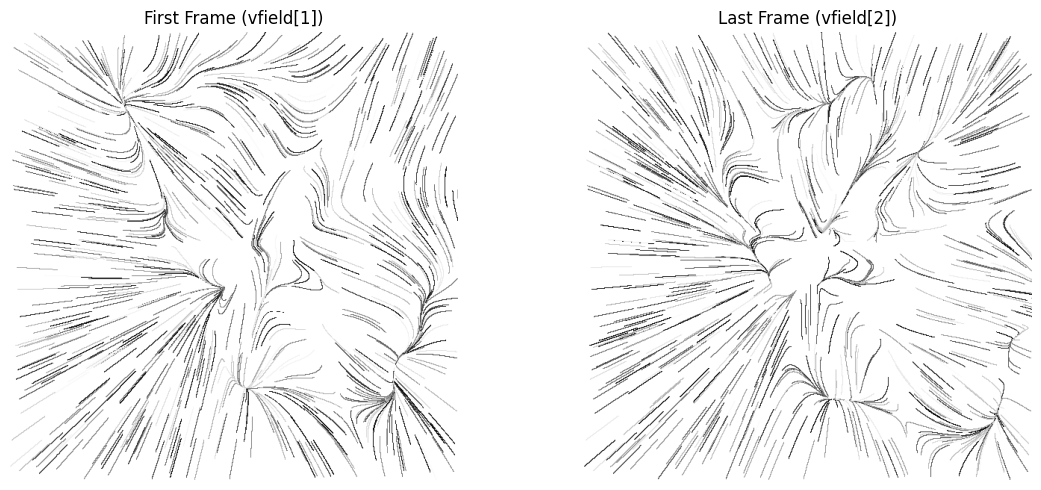

In [14]:
# Save animation as GIF
output_filename = "vector_field_animation.gif"
save_animation_gif(frames, output_filename, duration=150, loop=0)

# Display first and last frames to verify
print(f"\nFirst frame size: {frames[0].size}")
print(f"Last frame size: {frames[-1].size}")

# Display the first frame
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(frames[0])
plt.title("First Frame (vfield[1])")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frames[-1])
plt.title("Last Frame (vfield[2])")
plt.axis('off')

plt.tight_layout()
plt.show()

Creating higher quality animation...
Generating 25 animation frames...
Frame 1/25 (alpha = 0.000)


100%|██████████| 500/500 [00:00<00:00, 880.01it/s]


Converting to rgb image...
Resampling...
Frame 2/25 (alpha = 0.042)


100%|██████████| 500/500 [00:00<00:00, 807.18it/s]


Converting to rgb image...
Resampling...
Frame 3/25 (alpha = 0.083)


100%|██████████| 500/500 [00:00<00:00, 872.61it/s]


Converting to rgb image...
Resampling...
Frame 4/25 (alpha = 0.125)


100%|██████████| 500/500 [00:00<00:00, 930.02it/s]


Converting to rgb image...
Resampling...
Frame 5/25 (alpha = 0.167)


100%|██████████| 500/500 [00:00<00:00, 873.26it/s]


Converting to rgb image...
Resampling...
Frame 6/25 (alpha = 0.208)


100%|██████████| 500/500 [00:00<00:00, 946.11it/s]


Converting to rgb image...
Resampling...
Frame 7/25 (alpha = 0.250)


100%|██████████| 500/500 [00:00<00:00, 869.38it/s]


Converting to rgb image...
Resampling...
Frame 8/25 (alpha = 0.292)


100%|██████████| 500/500 [00:00<00:00, 868.17it/s]


Converting to rgb image...
Resampling...
Frame 9/25 (alpha = 0.333)


100%|██████████| 500/500 [00:00<00:00, 926.61it/s]


Converting to rgb image...
Resampling...
Frame 10/25 (alpha = 0.375)


100%|██████████| 500/500 [00:00<00:00, 961.89it/s]


Converting to rgb image...
Resampling...
Frame 11/25 (alpha = 0.417)


100%|██████████| 500/500 [00:00<00:00, 957.88it/s]


Converting to rgb image...
Resampling...
Frame 12/25 (alpha = 0.458)


100%|██████████| 500/500 [00:00<00:00, 984.83it/s]


Converting to rgb image...
Resampling...
Frame 13/25 (alpha = 0.500)


100%|██████████| 500/500 [00:00<00:00, 919.16it/s]


Converting to rgb image...
Resampling...
Frame 14/25 (alpha = 0.542)


100%|██████████| 500/500 [00:00<00:00, 920.71it/s]


Converting to rgb image...
Resampling...
Frame 15/25 (alpha = 0.583)


100%|██████████| 500/500 [00:00<00:00, 934.40it/s]


Converting to rgb image...
Resampling...
Frame 16/25 (alpha = 0.625)


100%|██████████| 500/500 [00:00<00:00, 895.31it/s]


Converting to rgb image...
Resampling...
Frame 17/25 (alpha = 0.667)


100%|██████████| 500/500 [00:00<00:00, 905.68it/s]


Converting to rgb image...
Resampling...
Frame 18/25 (alpha = 0.708)


100%|██████████| 500/500 [00:00<00:00, 947.42it/s]


Converting to rgb image...
Resampling...
Frame 19/25 (alpha = 0.750)


100%|██████████| 500/500 [00:00<00:00, 910.43it/s]


Converting to rgb image...
Resampling...
Frame 20/25 (alpha = 0.792)


100%|██████████| 500/500 [00:00<00:00, 849.54it/s]


Converting to rgb image...
Resampling...
Frame 21/25 (alpha = 0.833)


100%|██████████| 500/500 [00:00<00:00, 854.78it/s]


Converting to rgb image...
Resampling...
Frame 22/25 (alpha = 0.875)


100%|██████████| 500/500 [00:00<00:00, 915.17it/s]


Converting to rgb image...
Resampling...
Frame 23/25 (alpha = 0.917)


100%|██████████| 500/500 [00:00<00:00, 783.82it/s]


Converting to rgb image...
Resampling...
Frame 24/25 (alpha = 0.958)


100%|██████████| 500/500 [00:00<00:00, 959.53it/s]


Converting to rgb image...
Resampling...
Frame 25/25 (alpha = 1.000)


100%|██████████| 500/500 [00:00<00:00, 964.87it/s]


Converting to rgb image...
Resampling...
Saving animation to vector_field_animation_hq.gif...
Animation saved successfully!
High quality animation with 25 frames saved to vector_field_animation_hq.gif


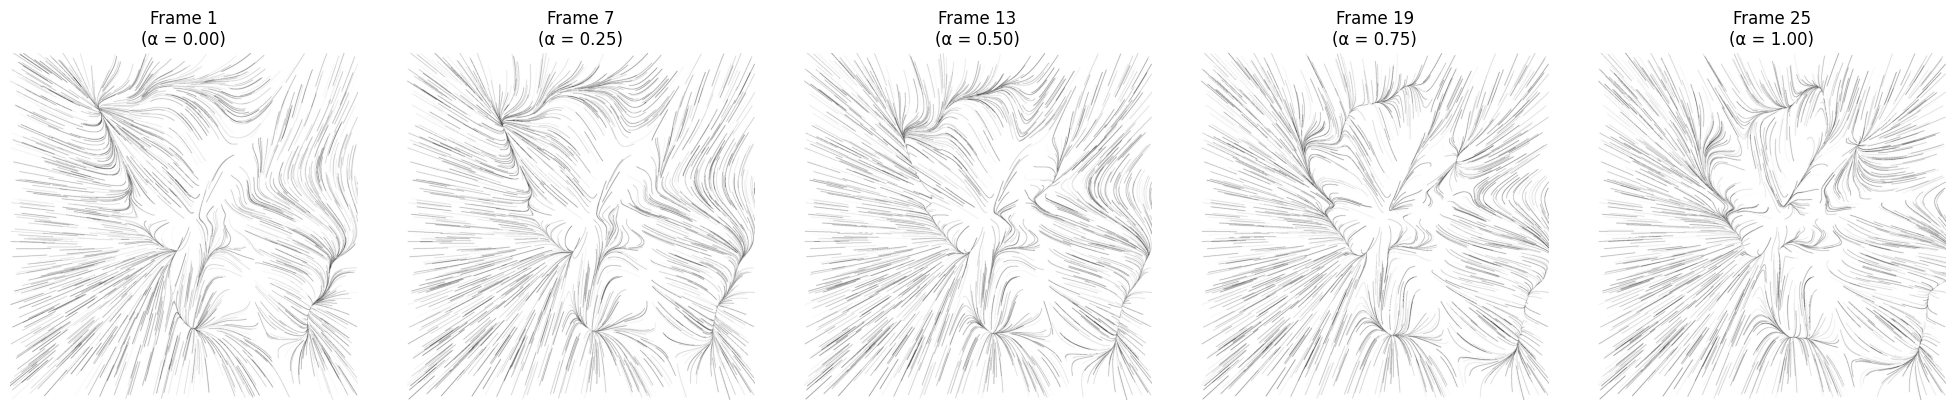

In [15]:
# Create a higher quality animation with more frames
print("Creating higher quality animation...")

# Define higher quality rendering parameters
hq_render_params = {
    'W': 800,
    'H': 800,
    'particles': 1500,
    'steps': 500,
    'step_size': 0.0002,
    'bg_color': (255, 255, 255),
    'trace_color': (0, 0, 0),
    'random_colors': True,
    'antialias': True,
    'aa_factor': 2
}

# Create more frames for smoother animation
num_frames_hq = 25
frames_hq = create_animation_frames(vfields[1], vfields[2], num_frames_hq, hq_render_params)

# Save high quality animation
hq_output_filename = "vector_field_animation_hq.gif"
save_animation_gif(frames_hq, hq_output_filename, duration=120, loop=0)

print(f"High quality animation with {len(frames_hq)} frames saved to {hq_output_filename}")

# Show a grid of sample frames
sample_indices = [0, 6, 12, 18, 24]  # Show frames at different stages
plt.figure(figsize=(20, 4))

for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(frames_hq[idx])
    alpha = idx / (num_frames_hq - 1)
    plt.title(f"Frame {idx+1}\n(α = {alpha:.2f})")
    plt.axis('off')

plt.tight_layout()
plt.show()

\nCreating comparison of interpolation methods...
Creating comparison frames for alpha = 0.0


100%|██████████| 200/200 [00:00<00:00, 1138.81it/s]


Converting to rgb image...


100%|██████████| 200/200 [00:00<00:00, 1109.38it/s]


Converting to rgb image...


100%|██████████| 200/200 [00:00<00:00, 1217.44it/s]


Converting to rgb image...
Creating comparison frames for alpha = 0.25


100%|██████████| 200/200 [00:00<00:00, 1286.07it/s]


Converting to rgb image...


100%|██████████| 200/200 [00:00<00:00, 1217.32it/s]


Converting to rgb image...


100%|██████████| 200/200 [00:00<00:00, 1358.79it/s]


Converting to rgb image...
Creating comparison frames for alpha = 0.5


100%|██████████| 200/200 [00:00<00:00, 1162.56it/s]


Converting to rgb image...


100%|██████████| 200/200 [00:00<00:00, 1309.71it/s]


Converting to rgb image...


100%|██████████| 200/200 [00:00<00:00, 1186.90it/s]


Converting to rgb image...
Creating comparison frames for alpha = 0.75


100%|██████████| 200/200 [00:00<00:00, 1258.88it/s]


Converting to rgb image...


100%|██████████| 200/200 [00:00<00:00, 1242.00it/s]


Converting to rgb image...


100%|██████████| 200/200 [00:00<00:00, 1274.28it/s]


Converting to rgb image...
Creating comparison frames for alpha = 1.0


100%|██████████| 200/200 [00:00<00:00, 1270.09it/s]


Converting to rgb image...


100%|██████████| 200/200 [00:00<00:00, 1113.34it/s]


Converting to rgb image...


100%|██████████| 200/200 [00:00<00:00, 1013.33it/s]


Converting to rgb image...


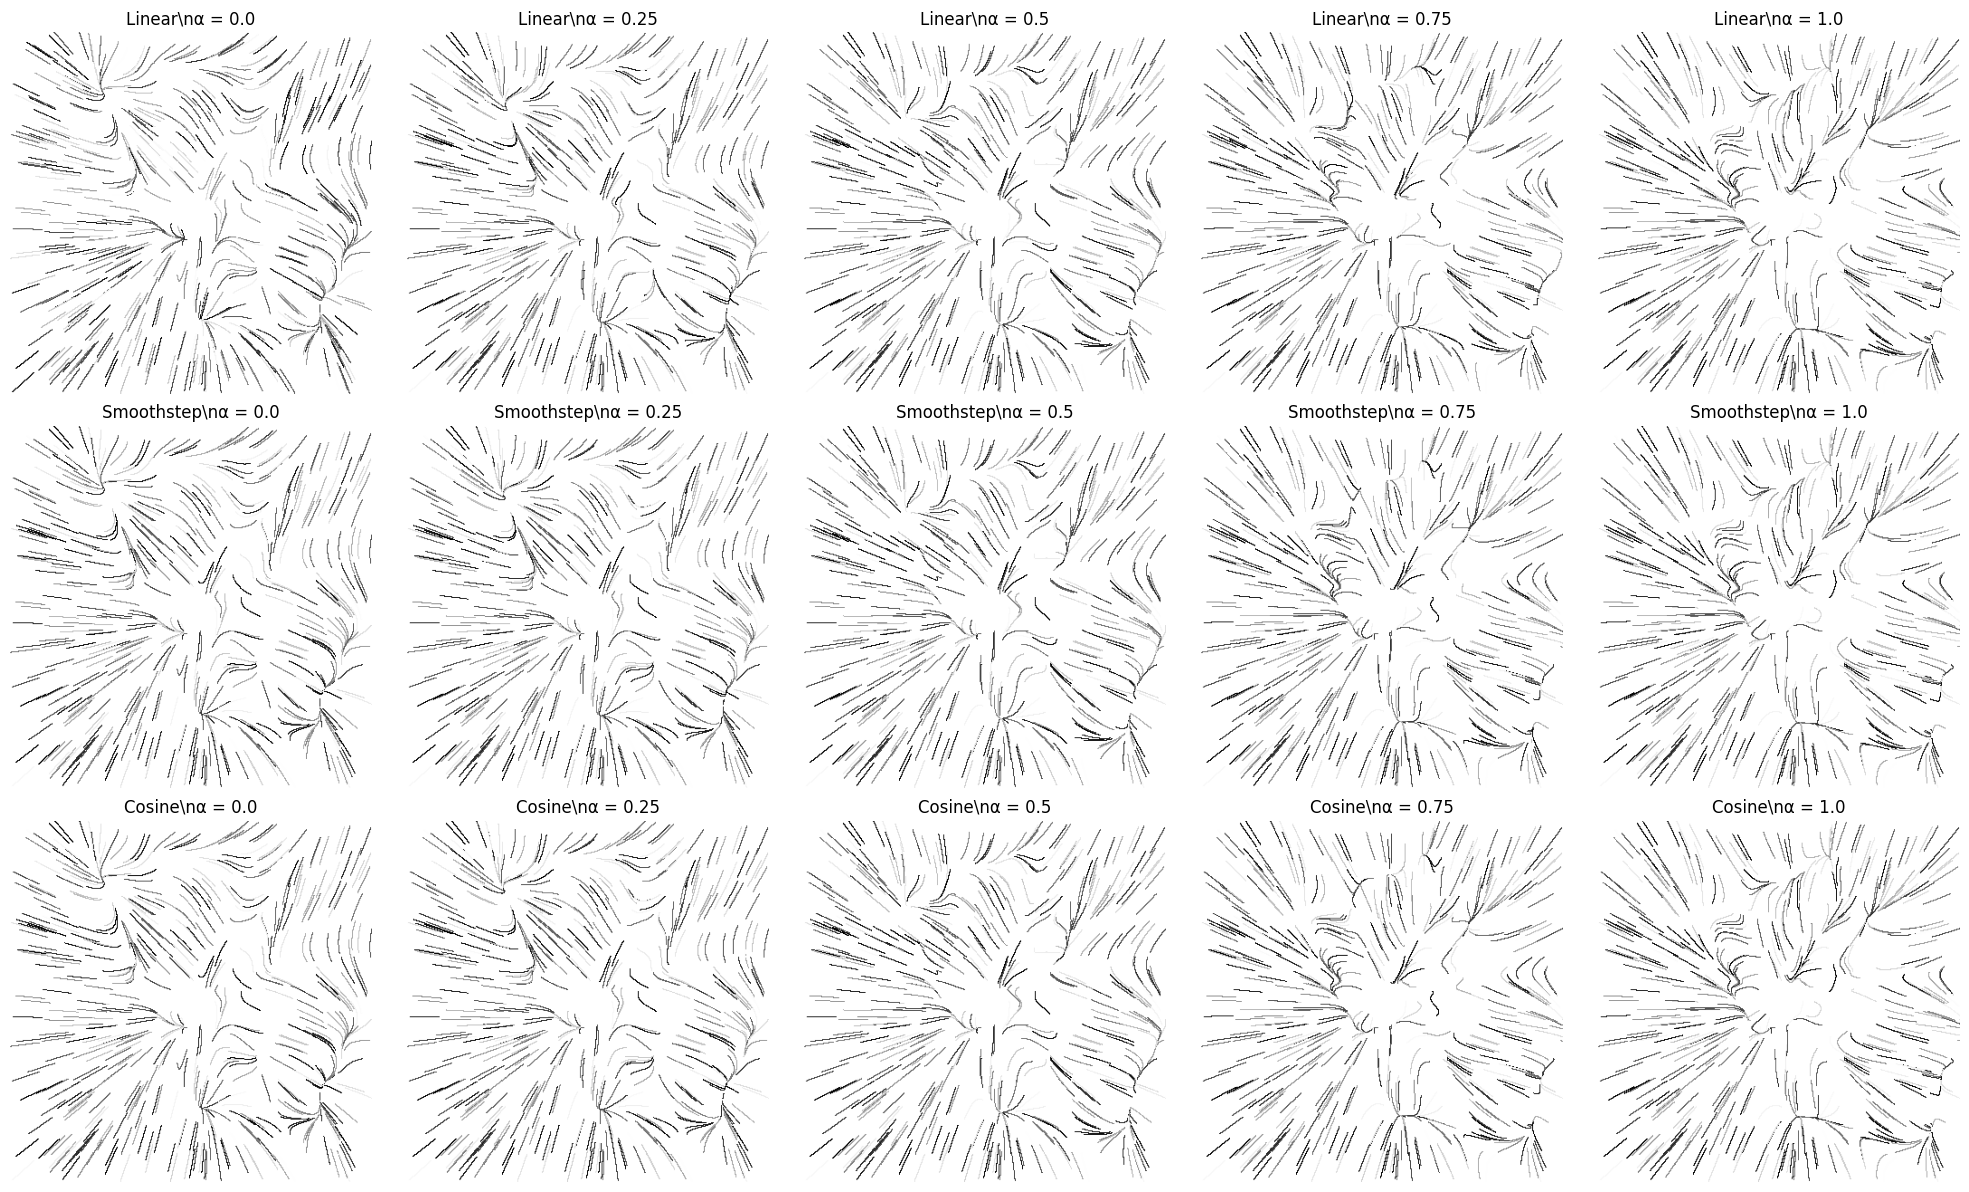

Interpolation comparison complete!


In [16]:
# Alternative interpolation methods
def smoothstep_interpolation(vfield1, vfield2, alpha):
    """Smoothstep interpolation for smoother transitions"""
    # Smoothstep function: 3α² - 2α³
    smooth_alpha = 3 * alpha**2 - 2 * alpha**3
    
    grid = vfield1['grid'].clone()
    displacement = (1 - smooth_alpha) * vfield1['displacement'] + smooth_alpha * vfield2['displacement']
    
    return {
        'grid': grid,
        'displacement': displacement
    }

def ease_in_out_interpolation(vfield1, vfield2, alpha):
    """Ease-in-out interpolation using cosine function"""
    # Cosine interpolation: (1 - cos(π * α)) / 2
    smooth_alpha = (1 - torch.cos(torch.tensor(np.pi * alpha))) / 2
    
    grid = vfield1['grid'].clone()
    displacement = (1 - smooth_alpha) * vfield1['displacement'] + smooth_alpha * vfield2['displacement']
    
    return {
        'grid': grid,
        'displacement': displacement
    }

# Create a comparison of different interpolation methods
print("\\nCreating comparison of interpolation methods...")

# Create frames with different interpolation methods
test_frames_linear = []
test_frames_smooth = []
test_frames_cosine = []

test_params = {
    'W': 400,
    'H': 400,
    'particles': 500,
    'steps': 200,
    'step_size': 0.0004,
    'bg_color': (255, 255, 255),
    'trace_color': (0, 0, 0),
    'random_colors': True,
    'antialias': False
}

# Create 5 test frames with different alpha values
test_alphas = [0.0, 0.25, 0.5, 0.75, 1.0]

for alpha in test_alphas:
    print(f"Creating comparison frames for alpha = {alpha}")
    
    # Linear interpolation
    linear_vfield = interpolate_vector_fields(vfields[1], vfields[2], alpha)
    grid_l = linear_vfield['grid'].to(device)
    disp_l = linear_vfield['displacement'].to(device)
    frame_l = render_flow_field(grid_l, disp_l, **test_params)
    test_frames_linear.append(frame_l)
    
    # Smoothstep interpolation
    smooth_vfield = smoothstep_interpolation(vfields[1], vfields[2], alpha)
    grid_s = smooth_vfield['grid'].to(device)
    disp_s = smooth_vfield['displacement'].to(device)
    frame_s = render_flow_field(grid_s, disp_s, **test_params)
    test_frames_smooth.append(frame_s)
    
    # Cosine interpolation
    cosine_vfield = ease_in_out_interpolation(vfields[1], vfields[2], alpha)
    grid_c = cosine_vfield['grid'].to(device)
    disp_c = cosine_vfield['displacement'].to(device)
    frame_c = render_flow_field(grid_c, disp_c, **test_params)
    test_frames_cosine.append(frame_c)

# Display comparison
plt.figure(figsize=(20, 12))

methods = ['Linear', 'Smoothstep', 'Cosine']
frames_list = [test_frames_linear, test_frames_smooth, test_frames_cosine]

for i, (method, frames) in enumerate(zip(methods, frames_list)):
    for j, (alpha, frame) in enumerate(zip(test_alphas, frames)):
        plt.subplot(3, 5, i*5 + j + 1)
        plt.imshow(frame)
        plt.title(f"{method}\\nα = {alpha}")
        plt.axis('off')

plt.tight_layout()
plt.show()

print("Interpolation comparison complete!")

# Vector Field Animation Summary

This notebook demonstrates how to create smooth animations between vector field keyframes by interpolating the displacement vectors while keeping the grid fixed.

## What we accomplished:

1. **Linear Interpolation**: Basic interpolation between `vfields[1]` and `vfields[2]`
2. **Animated GIF Generation**: Created two animated GIFs:
   - `vector_field_animation.gif` - Quick test version (15 frames, 600x600)
   - `vector_field_animation_hq.gif` - High quality version (25 frames, 800x800, antialiased)

3. **Alternative Interpolation Methods**: 
   - **Linear**: Simple weighted average
   - **Smoothstep**: Uses 3α² - 2α³ for smoother transitions
   - **Cosine**: Uses (1 - cos(π·α))/2 for ease-in-out motion

## Key Features:

- ✅ Smooth interpolation between vector field keyframes
- ✅ Configurable animation parameters (frames, quality, etc.)
- ✅ Multiple interpolation methods for different animation styles
- ✅ Animated GIF output with infinite loop
- ✅ Progress tracking during generation
- ✅ GPU acceleration when available

## Files Generated:
- `vector_field_animation.gif` (test version)
- `vector_field_animation_hq.gif` (high quality version)

The animations show a smooth transition from the flow pattern in `vfields[1]` to the flow pattern in `vfields[2]`, creating a seamless morphing effect between the two vector field configurations.

In [17]:
# Bonus: Multi-keyframe animation function
def create_multi_keyframe_animation(vfields_list, frames_per_transition=10, render_params=None):
    """
    Create an animation that transitions through multiple vector field keyframes.
    
    Args:
        vfields_list: List of vector field dictionaries to animate between
        frames_per_transition: Number of frames between each pair of keyframes
        render_params: Dictionary of rendering parameters
    
    Returns:
        List of PIL Images representing the full animation
    """
    if render_params is None:
        render_params = {
            'W': 600,
            'H': 600,
            'particles': 800,
            'steps': 300,
            'step_size': 0.0003,
            'bg_color': (255, 255, 255),
            'trace_color': (0, 0, 0),
            'random_colors': True,
            'antialias': False
        }
    
    all_frames = []
    
    for i in range(len(vfields_list) - 1):
        print(f"Creating transition {i+1}/{len(vfields_list)-1}: vfield[{i}] -> vfield[{i+1}]")
        
        # Create frames for this transition
        transition_frames = create_animation_frames(
            vfields_list[i], vfields_list[i+1], 
            frames_per_transition, render_params
        )
        
        # Add frames (skip the first frame if not the first transition to avoid duplicates)
        if i == 0:
            all_frames.extend(transition_frames)
        else:
            all_frames.extend(transition_frames[1:])  # Skip first frame to avoid duplicate
    
    return all_frames

# Example usage (commented out to save time)
# print("Creating multi-keyframe animation with vfields[1] -> vfields[2] -> vfields[3]...")
# multi_frames = create_multi_keyframe_animation([vfields[1], vfields[2], vfields[3]], frames_per_transition=8)
# save_animation_gif(multi_frames, "multi_keyframe_animation.gif", duration=100)

print("Multi-keyframe animation function defined!")
print("\\nTo create a full sequence animation, uncomment and run:")
print("multi_frames = create_multi_keyframe_animation([vfields[1], vfields[2], vfields[3]], frames_per_transition=8)")
print("save_animation_gif(multi_frames, 'multi_keyframe_animation.gif', duration=100)")

Multi-keyframe animation function defined!
\nTo create a full sequence animation, uncomment and run:
multi_frames = create_multi_keyframe_animation([vfields[1], vfields[2], vfields[3]], frames_per_transition=8)
save_animation_gif(multi_frames, 'multi_keyframe_animation.gif', duration=100)


In [ ]:
plt.figure(figsize=(15, 5))

for i, vfield in enumerate(vfields):

    if i == 0:  # the first field is collapsed at the origin
        continue

    grid = vfield['grid'].to(device)
    displacement=vfield['displacement'].to(device)

    ff_img = render_flow_field(
        grid, displacement,
        W=1000, H=1000,
        particles=1_000,
        steps=1000,
        step_size=0.0001,
        bg_color=(255, 255, 255),
        trace_color=(0, 0, 0),
        random_colors=True,
        antialias=False
    )

    plt.subplot(2, 5, i)
    plt.imshow(ff_img, origin='lower')
    plt.axis('off')

plt.tight_layout()
plt.show()